# US Accidents Exploratory Data Analysis


**About the Dataset** - 
The Dataset is obtained from Kaggel.

This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2020 for the Contiguous United States. Check here to learn more about this dataset.


Importing US Accidents data set from kaggel

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddharthksidd
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:03<00:00, 84.6MB/s]


In [4]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_Updated.csv'

## Data Preparation and Cleaning



Loading the data into Pandas DataFrame

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(data_filename)

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


Getting to know the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


Lets check the number of columns which has numeric dtype 

In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Out of 46 columns only 14 columns are in numeric data type

Percentage of missing values per column

In [11]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) *100
missing_percentages

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
Amenity                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description         

In [12]:
type(missing_percentages)

pandas.core.series.Series

Visualising the missing values percentages

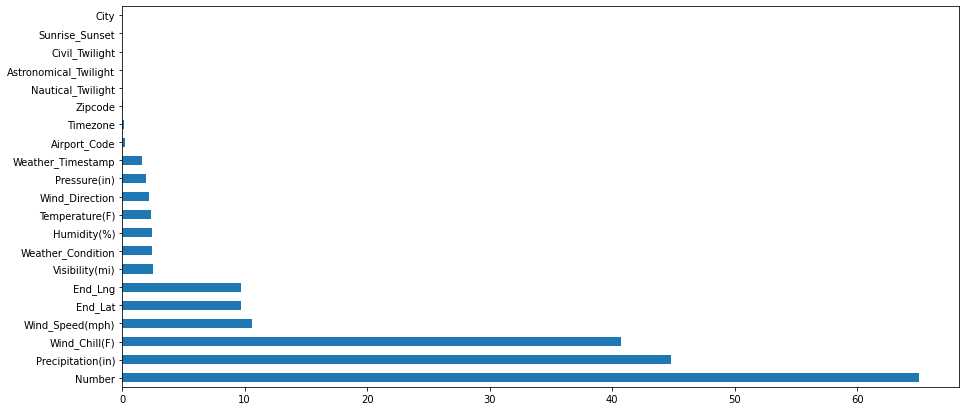

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
missing_percentages[missing_percentages != 0].plot(kind='barh')

Removing columns that has high missing percentage.

In [16]:
df.drop(['Number', 'Precipitation(in)','Wind_Chill(F)'], axis = 1, inplace = True)

KeyError: ignored

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Humidity(%)            float64
 22  Pressure(in)      

## Exploratory Analysis and Visualization

Columns chosen for analysis:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [18]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

### City

In [19]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

Total number of Cities in the Dataset

In [20]:
cities = df.City.unique()
len(cities)

11790

No. of Accidents occured in each city

In [21]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Osawatomie         1
Minong             1
Hurdsfield         1
Wainscott          1
Concord Twp        1
Name: City, Length: 11789, dtype: int64

Top 20 Cities with high occurance of accidents

In [22]:
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [23]:
type(cities_by_accident)

pandas.core.series.Series

Visualising Top 20 cities by occcurance of ccidents 

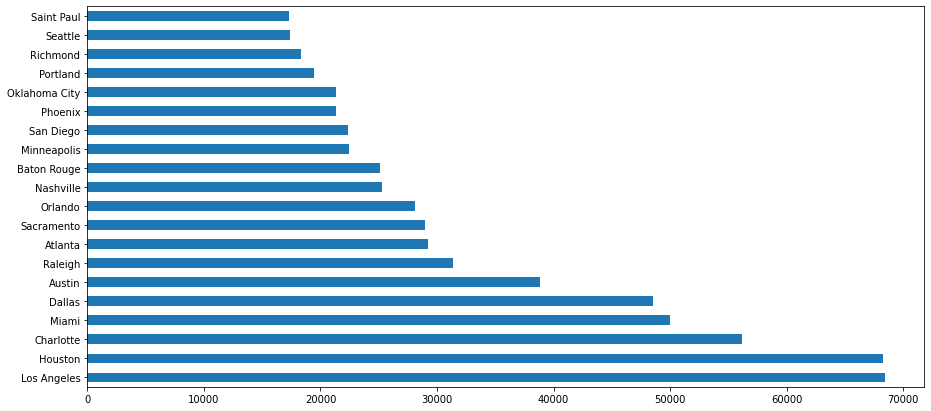

In [24]:
x = cities_by_accident[:20]
plt.figure(figsize=(15,7))
cities_by_accident[:20].plot(kind='barh')

In [25]:
import seaborn as sns
sns.set_style("darkgrid")

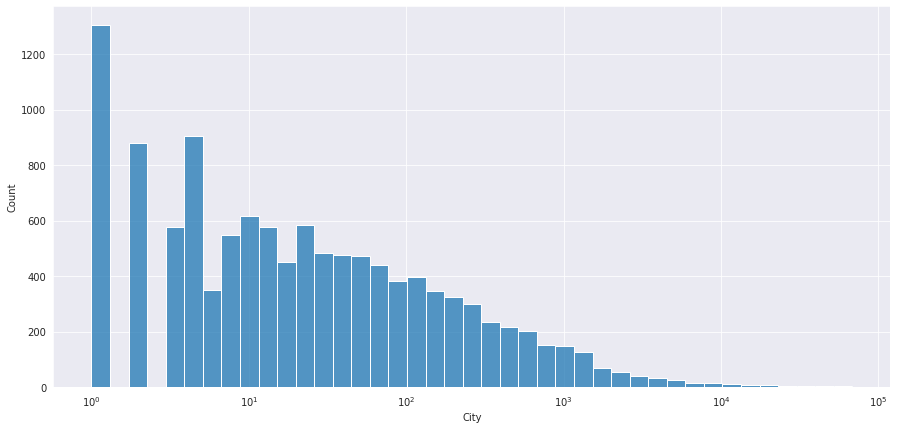

In [26]:
plt.figure(figsize=(15,7))
sns.histplot(cities_by_accident, log_scale=True)

Cities which had only one accident 

In [27]:
cities_by_accident[cities_by_accident == 1]

Belle Fourche    1
Merna            1
Colmesneil       1
South Hampton    1
Valley Spring    1
                ..
Osawatomie       1
Minong           1
Hurdsfield       1
Wainscott        1
Concord Twp      1
Name: City, Length: 1306, dtype: int64

Top 10 States which incoprates top cities by number of accidents

In [28]:
dfgp = df.groupby(['State', 'City']).City.count().to_frame().rename(columns={'City': 'Count'}).reset_index()
dfgp = dfgp.sort_values(by='Count',ascending=False)
dfgp_100 =  dfgp.head(100)
dfgp_100

,State,City,Count
1422,CA,Los Angeles,68411
14754,TX,Houston,68191
8642,NC,Charlotte,56038
2874,FL,Miami,49913
14618,TX,Dallas,48266
...,...,...,...
1617,CA,Pasadena,3958
15743,VA,Norfolk,3905
1402,CA,Livermore,3903
2067,CO,Colorado Springs,3824


In [29]:
dftopstate = dfgp_100.groupby(['State']).Count.sum().sort_values(ascending=False).head(10).reset_index()
dftopstate


,State,Count
0,CA,293209
1,TX,185773
2,FL,153855
3,NC,87388
4,LA,42082
5,MN,39636
6,TN,36091
7,NY,35349
8,AZ,34701
9,GA,34131


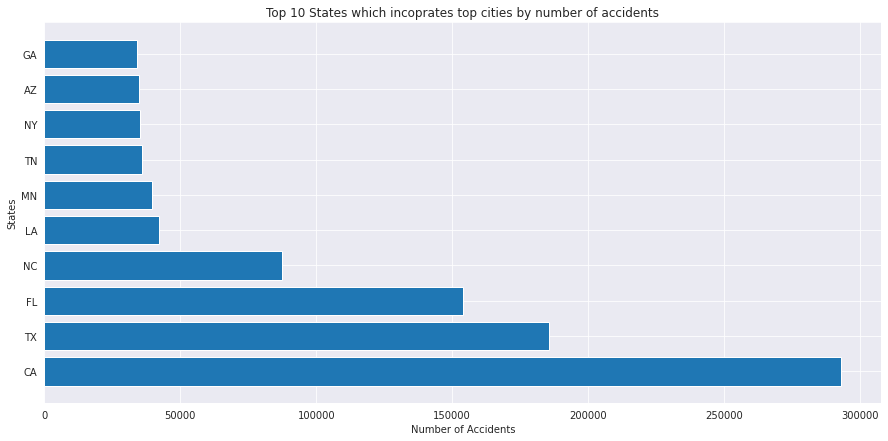

In [30]:
plt.figure(figsize= (15,7))
plt.barh(dftopstate.State, dftopstate.Count)
plt.xlabel('Number of Accidents')
plt.ylabel('States')
plt.title('Top 10 States which incoprates top cities by number of accidents')
plt.grid(True)
plt.show()

### Start Time

Analysis by the time at which the accident occured.

In [32]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

Changing the Start_time data type to datetime data type for further analysis

In [33]:
df.Start_Time = pd.to_datetime(df.Start_Time)

- Figure out how to show percentages

Visualising accident occurance in a hourly basis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


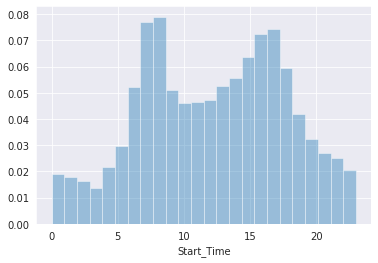

In [34]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

- A high percentage of accidents occur between 6 am to 10 am (probably people are in a hurry to get to work)
- Next higest percentage is 3 pm to 6 pm.

Visualising accident occurance on each day in a weekly basis.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


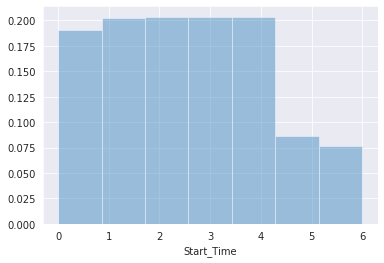

In [35]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

Accidents occurance are high in weekdays and are less on weekends(Saturday & Sunday) 

Is the distribution of accidents by hour the same on weekends as on weekdays.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


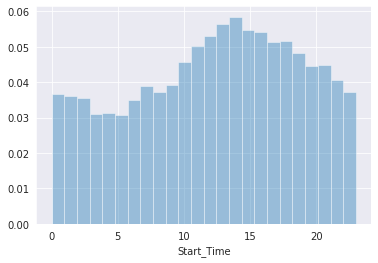

In [36]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


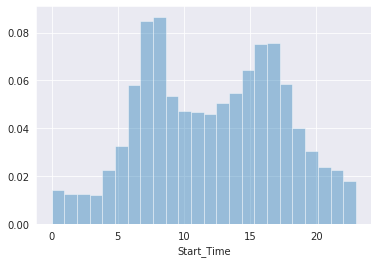

In [37]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


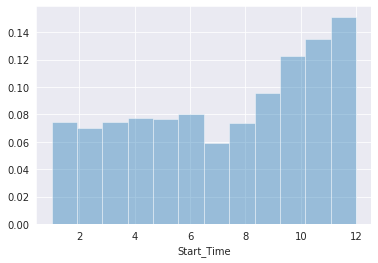

In [38]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

It seems that occurance of accidents is high during winter season when compared to other seasons.
Lets verify the same that do accidents occure frequenntly during winter season every year.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


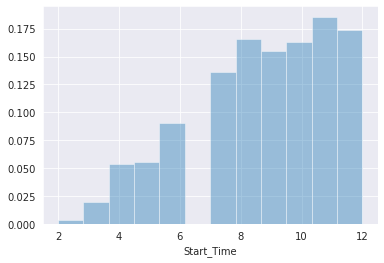

In [39]:
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


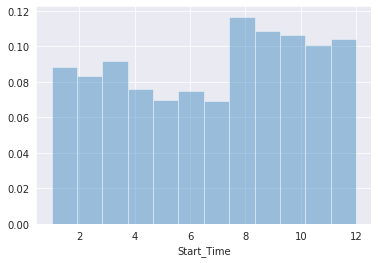

In [40]:
df_year = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


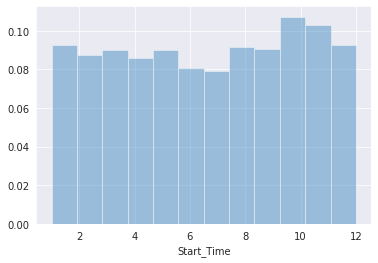

In [41]:
df_year = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


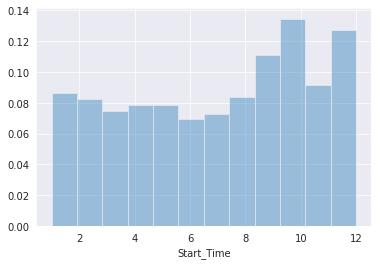

In [42]:
df_year = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

when driling down the data to each year we can see that our Hypothesis was False. It seems that data collection is started from 2016 and there may be some missing data during the start which may be the reason for the skewness.

### Start Latitude & Longitude


In [43]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [44]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [45]:
sample_df = df.sample(int(0.1 * len(df)))

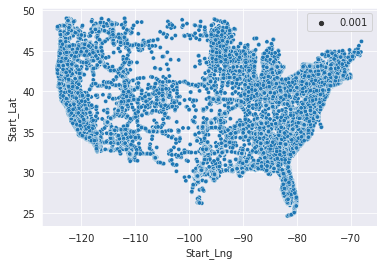

In [46]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [47]:
import folium

In [48]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [49]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1214524    34.152016
1687979    33.696520
2309778    34.263651
126854     35.863243
1552020    37.900940
             ...    
547681     37.594749
1046277    32.731915
786305     35.039340
691426     33.939160
803761     41.214214
Name: Start_Lat, Length: 100, dtype: float64
1214524    -83.646606
1687979    -84.410900
2309778   -118.989123
126854     -78.589813
1552020   -122.310699
              ...    
547681     -77.517333
1046277   -117.060860
786305    -120.486740
691426     -84.500580
803761    -111.959457
Name: Start_Lng, Length: 100, dtype: float64


In [50]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [51]:
from folium.plugins import HeatMap

In [52]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [53]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
HeatMap(lat_lon_pairs).add_to(map)
map

By Heat map visualisation we can see that occurance of accidennts is more frequent in the west and east part of USA.


#Temperature 

Lets Check weather Temperature has an impact on Accident occurances, weather there are high accident occurances when temperature is low. 

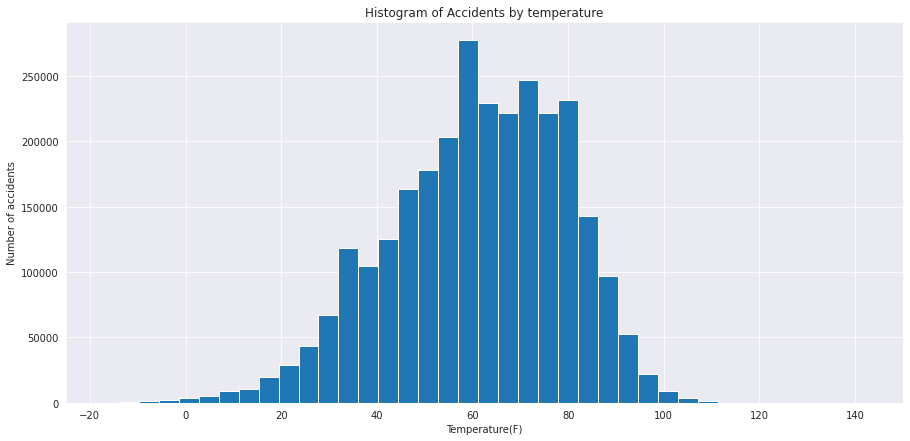

In [54]:
plt.figure(figsize=(15,7))
plt.hist(df['Temperature(F)'], bins = 70)
plt.xlabel('Temperature(F)')
plt.ylabel('Number of accidents')
plt.title('Histogram of Accidents by temperature')
plt.xlim(-25,150)
plt.grid(True)
plt.show()

From the Histogram we can clearly see that Number of accident occurances is high during the temperature range 55°F to 75°F.

Normal Temperature range of USA is 16°F to 86°F. The general undersanding that more accidents occur during Winter or lower temperature seems to be False. Moreover Number of accidents occurances is lower when temperature is less. 

# Weather Condition

In [55]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [58]:
dfweather =df[['Weather_Timestamp', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity']]
dfweather

,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity
0,2019-05-21 08:53:00,76.0,52.0,28.91,10.0,N,7.0,Fair,False
1,2019-10-07 17:53:00,76.0,62.0,29.30,10.0,VAR,3.0,Cloudy,False
2,2020-12-13 21:53:00,51.0,80.0,30.17,10.0,W,6.0,Fair,False
3,2018-04-17 16:55:00,53.6,16.0,30.16,10.0,SSW,4.6,Clear,False
4,2016-08-31 17:53:00,84.2,84.0,29.92,10.0,SSE,13.8,Overcast,False
...,...,...,...,...,...,...,...,...,...
2906605,2018-06-28 08:35:00,84.2,70.0,30.02,9.0,Variable,5.8,Clear,False
2906606,2019-01-10 02:00:00,46.9,74.0,30.14,10.0,Calm,NaN,Clear,False
2906607,2020-11-23 12:53:00,76.0,85.0,30.00,10.0,NNW,16.0,Mostly Cloudy,False
2906608,2019-12-29 22:54:00,27.0,81.0,25.81,10.0,SSE,8.0,Cloudy,False


In [59]:
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Weather_Timestamp  object 
 1   Temperature(F)     float64
 2   Humidity(%)        float64
 3   Pressure(in)       float64
 4   Visibility(mi)     float64
 5   Wind_Direction     object 
 6   Wind_Speed(mph)    float64
 7   Weather_Condition  object 
 8   Amenity            bool   
dtypes: bool(1), float64(5), object(3)
memory usage: 180.2+ MB


In [60]:
dfweather.corr()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity
Temperature(F),1.000000,-0.344177,0.040501,0.178301,0.039756,0.000059
Humidity(%),-0.344177,1.000000,0.126864,-0.368379,-0.155178,-0.003343
Pressure(in),0.040501,0.126864,1.000000,-0.005270,0.000514,0.013203
Visibility(mi),0.178301,-0.368379,-0.005270,1.000000,0.024108,0.006207
Wind_Speed(mph),0.039756,-0.155178,0.000514,0.024108,1.000000,0.001433
Amenity,0.000059,-0.003343,0.013203,0.006207,0.001433,1.000000


In [61]:
dfweather.Weather_Timestamp = pd.to_datetime(dfweather.Weather_Timestamp)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
dfweather.Weather_Timestamp

0         2019-05-21 08:53:00
1         2019-10-07 17:53:00
2         2020-12-13 21:53:00
3         2018-04-17 16:55:00
4         2016-08-31 17:53:00
                  ...        
2906605   2018-06-28 08:35:00
2906606   2019-01-10 02:00:00
2906607   2020-11-23 12:53:00
2906608   2019-12-29 22:54:00
2906609   2018-03-26 13:54:00
Name: Weather_Timestamp, Length: 2906610, dtype: datetime64[ns]

Accident Occurance Distribution based on Weather time stamp

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


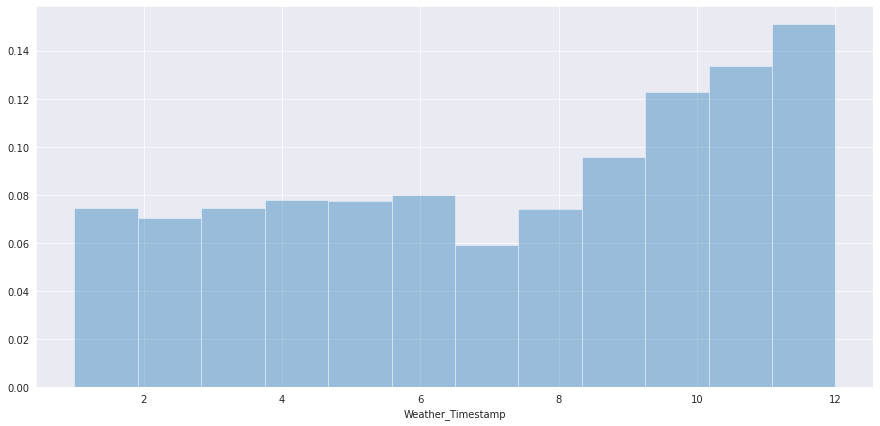

In [63]:
plt.figure(figsize=(15,7))
sns.distplot(dfweather.Weather_Timestamp.dt.month, bins=12, kde=False, norm_hist=True)

As seen before data collection was started from 2016 and there may be some missing data during the start so lets skip year 2016.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


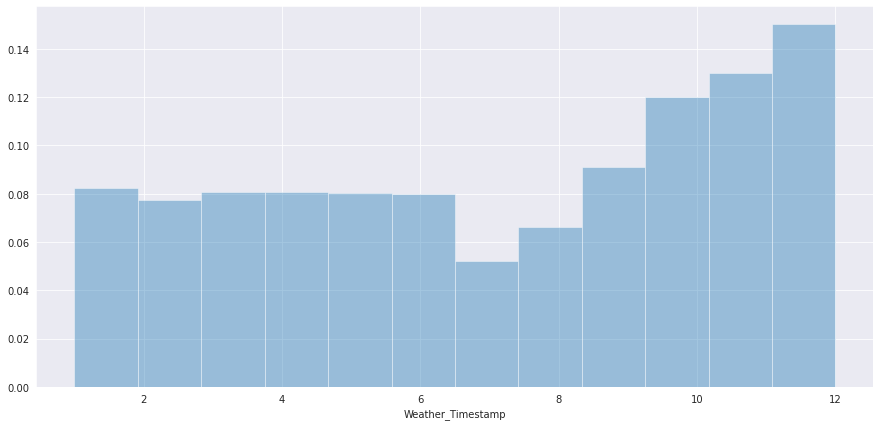

In [64]:
dfw_year = dfweather[dfweather.Weather_Timestamp.dt.year > 2016]
plt.figure(figsize=(15,7))
sns.distplot(dfw_year.Weather_Timestamp.dt.month, bins=12, kde=False, norm_hist=True)

Based on Weather Time stamp accident occurances is more during the last three months.

In [65]:
df_month = dfw_year[dfweather.Weather_Timestamp.dt.month > 9]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [67]:
dfwc = df_month.Weather_Condition.value_counts().to_frame()
dfwc = dfwc.reset_index()
dfwc.columns= ['Weather_Condition','Count']
dfwc

,Weather_Condition,Count
0,Fair,339257
1,Cloudy,117206
2,Mostly Cloudy,107379
3,Clear,99056
4,Partly Cloudy,72787
...,...,...
93,Sleet / Windy,1
94,Drizzle / Windy,1
95,Heavy Smoke,1
96,Funnel Cloud,1


Top 20 Weather Conditions where accident occurance is high

In [68]:
dfwc = dfwc.head(20)

<BarContainer object of 20 artists>

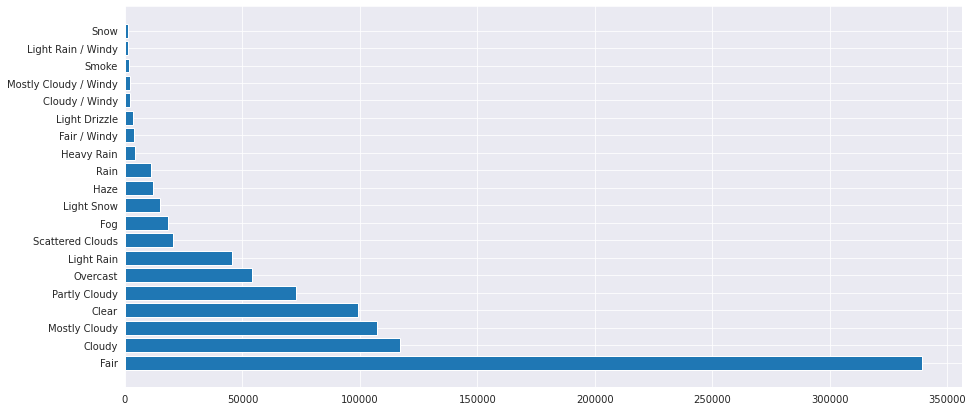

In [69]:
plt.figure(figsize=(15,7))
plt.barh(dfwc.Weather_Condition, dfwc.Count)

From the Bar chart we can clearly see the most of the accidents occur during normal weather conditions. Hence Weather conditions dosen't have impact on accident occurance. 

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.

## Findings

1. Top 20 Cities where accident occurance is more.

In [70]:
cities_by_accident[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

2. Top 10 State which incoprates top cities which high number of accidents. 

In [72]:
dftopstate

,State,Count
0,CA,293209
1,TX,185773
2,FL,153855
3,NC,87388
4,LA,42082
5,MN,39636
6,TN,36091
7,NY,35349
8,AZ,34701
9,GA,34131


3. During a Day high Number of accidents occur between 6 am to 10 am (probably people are in a hurry to get to work) and next higest percentage is 3 pm to 6 pm.

4. Accidents occurance are high in weekdays and are less on weekends(Saturday & Sunday) 

5. By Heat map visualisation of occurace location we can see that occurance of accidennts is more frequent in the west and east part of USA.

In [77]:
map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
HeatMap(lat_lon_pairs).add_to(map)
map

6. Number of accident occurances is high during the temperature range 55°F to 75°F. Normal Temperature range of USA is 16°F to 86°F. The general undersanding that more accidents occur during Winter or lower temperature seems to be False. Moreover Number of accidents occurances is lower when temperature is less. 

7. Based on Weather Time stamp accident occurances is more during the last three months but most of the accidents occurances during the last three month has been recorded as normal weather conditions. Hence Weather conditions dosen't have impact on accident occurance

# Summary 

1. High nummber of accidents occur during the commuting hours between 6 am to 10 am  3 pm to 6 pm.
2. Weather and Temperature dosent have a significant impact on accident occuraces.
3. Most of the accidents occur at the eastern and western part of USA where population is high.